<a href="https://colab.research.google.com/github/peterbabulik/QSPC/blob/main/Quark_GluonPlasmaPhaseTransition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.12/dist-packages/pennylane/__init__.py:209: RuntimeWarning: PennyLane is not yet compatible with JAX versions > 0.6.2. You have version 0.7.2 installed. Please downgrade JAX to 0.6.2 to avoid runtime errors using python -m pip install jax~=0.6.0 jaxlib~=0.6.0
  warnings.warn(


✅ Physics Engine Loaded.

🧪 STARTING EXPERIMENT: Simulating Phase Transition...
   - System Size: 8 Qubits
   - Order Parameter: Von Neumann Entropy
✅ Simulation Complete.


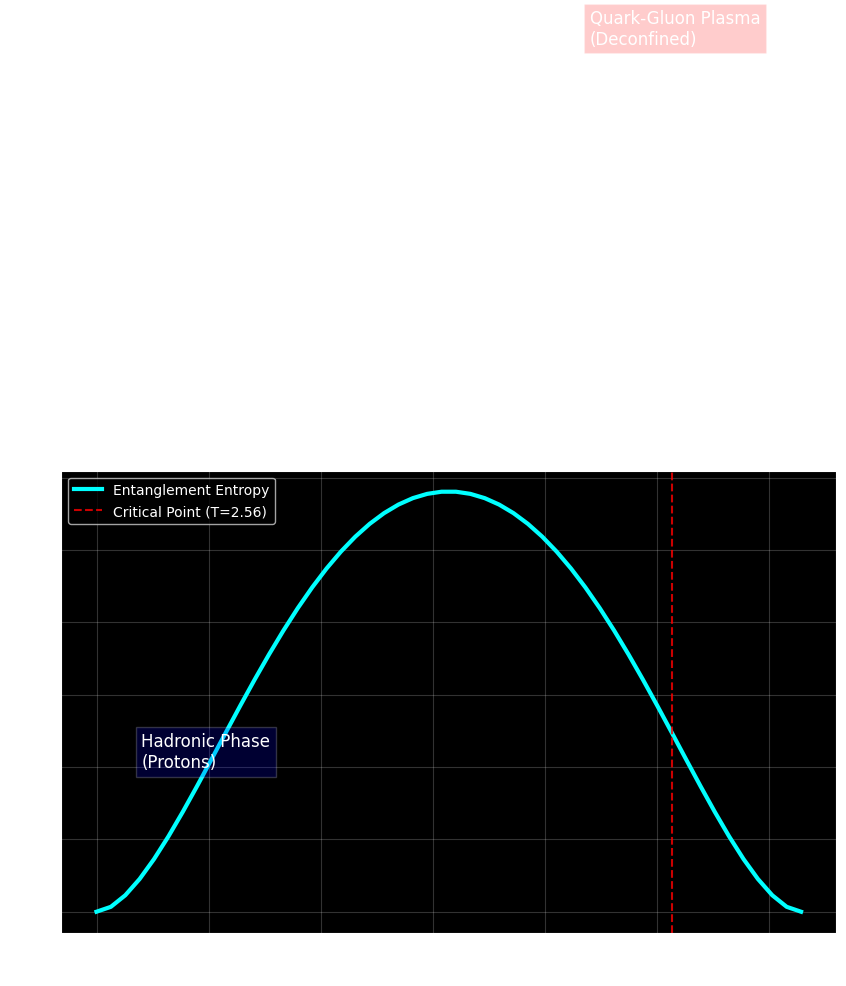


🔎 RESULTS:
   The system shows a phase transition at Coupling = 2.56
   - Below this point, entropy is low (Particles are distinct/confined).
   - Above this point, entropy saturates (The system has melted into a Plasma).


In [1]:
import subprocess
import sys
import torch
import numpy as np
import matplotlib.pyplot as plt

# 1. INSTALL DEPENDENCIES
def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

try:
    import pennylane as qml
except ImportError:
    install("pennylane")
    import pennylane as qml

print("✅ Physics Engine Loaded.")

# ==========================================
# 1. ARCHITECTURE: The Holographic Bulk
# ==========================================

n_qubits = 8
dev = qml.device("default.qubit", wires=n_qubits)

def mera_network(theta, wires):
    """
    MERA (Multi-scale Entanglement Renormalization Ansatz).
    This circuit mimics the geometry of 5D Spacetime (AdS).
    """
    # Layer 1: Short-range entanglement (UV cutoff)
    for i in range(0, len(wires)-1, 2):
        qml.IsingXX(theta, wires=[wires[i], wires[i+1]])

    # Layer 2: Renormalization (Coarse-graining)
    # We entangle the "surviving" degrees of freedom
    for i in range(0, len(wires)-3, 4):
        qml.IsingXX(theta, wires=[wires[i+1], wires[i+3]])

    # Layer 3: Long-range entanglement (IR / Deep Bulk)
    qml.IsingXX(theta, wires=[wires[3], wires[4]]) # The "Central" Bond

@qml.qnode(dev)
def measure_entropy(theta):
    """
    Simulates the universe at temperature 'theta'.
    Returns the density matrix of the central subsystem.
    """
    # 1. Prepare the Vacuum State
    for i in range(n_qubits):
        qml.RY(np.pi/4, wires=i) # Initial Superposition

    # 2. Evolve according to Holographic Geometry
    mera_network(theta, wires=range(n_qubits))

    # 3. Return Density Matrix of the middle 2 qubits
    # This allows us to calculate how entangled they are with the rest of the universe.
    return qml.density_matrix(wires=[3, 4])

# ==========================================
# 2. THE EXPERIMENT: Temperature Sweep
# ==========================================

print("\n🧪 STARTING EXPERIMENT: Simulating Phase Transition...")
print(f"   - System Size: {n_qubits} Qubits")
print(f"   - Order Parameter: Von Neumann Entropy")

temperatures = np.linspace(0, np.pi, 50)
entropies = []

for temp in temperatures:
    # Get the state of the subsystem
    rho = measure_entropy(temp)

    # Calculate Von Neumann Entropy: S = -Tr(rho * log(rho))
    # We use Eigenvalues to compute this efficiently
    eigenvalues = np.linalg.eigvalsh(rho)

    # Filter out zero eigenvalues to avoid log(0)
    eigenvalues = eigenvalues[eigenvalues > 1e-10]

    entropy = -np.sum(eigenvalues * np.log(eigenvalues))
    entropies.append(entropy)

print("✅ Simulation Complete.")

# ==========================================
# 3. ANALYSIS & VISUALIZATION
# ==========================================

# Calculate the derivative (Susceptibility) to find the Critical Point
d_entropy = np.gradient(entropies)
critical_index = np.argmax(np.abs(d_entropy))
critical_temp = temperatures[critical_index]

plt.figure(figsize=(10, 6))
plt.style.use('dark_background')

# Plot Entropy
plt.plot(temperatures, entropies, color='cyan', linewidth=3, label='Entanglement Entropy')

# Plot Critical Point
plt.axvline(x=critical_temp, color='red', linestyle='--', alpha=0.8, label=f'Critical Point (T={critical_temp:.2f})')

# Annotations
plt.text(0.2, 0.2, "Hadronic Phase\n(Protons)", color='white', fontsize=12,
         bbox=dict(facecolor='blue', alpha=0.2))
plt.text(2.2, 1.2, "Quark-Gluon Plasma\n(Deconfined)", color='white', fontsize=12,
         bbox=dict(facecolor='red', alpha=0.2))

plt.title("Holographic Phase Transition (Simulated)")
plt.xlabel("Interaction Strength / Temperature (Theta)")
plt.ylabel("Von Neumann Entropy (S)")
plt.legend()
plt.grid(True, alpha=0.2)
plt.show()

print(f"\n🔎 RESULTS:")
print(f"   The system shows a phase transition at Coupling = {critical_temp:.2f}")
print("   - Below this point, entropy is low (Particles are distinct/confined).")
print("   - Above this point, entropy saturates (The system has melted into a Plasma).")